# libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [43]:
!pip install dython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import sys
import pickle

from scipy.stats import rankdata
from scipy.stats import chi2_contingency
from dython import nominal as nom

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import requests
import json

import textwrap

# data processing

data: the census bureau’s 2021 american community survey (acs) public use microdata sample (pums) \\
data dictionary: https://docs.google.com/document/d/1hGPmwgD06HIE2_xxVq_vM5hiXBkpkHPKOc7wLQHmA8M/edit \\
census data dictionary: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2021.pdf

In [ ]:
target = "PINCP"
weight = "PWGTP"
housing_identifier = "SERIALNO"
person_identifier = "SPORDER"
lim = "limiter"

weight_col = None

In [ ]:
vars = ["PINCP", "PWGTP", "SERIALNO", "SPORDER", "HHLDRAGEP", "BROADBND", "SMARTPHONE", "TEL",
        "TABLET", "LAPTOP", "ACCESSINET", "COMPOTHX", "OTHSVCEX", "SATELLITE", "HISPEED",
        "DIALUP", "RAC2P", "RAC3P", "RAC1P", "ANC2P", "ANC1P", "HINS1", "HINS2", "HINS3",
        "HINS4", "HINS5", "HINS6", "HINS7", "HICOV",
        "PRIVCOV", "PUBCOV", "FHINS4C", "FHINS3C", "FHINS5C",
        "SSIP", "ELEP", "RACNUM", "WATP", "MHP", "RETP",
        "SSP", "HINCP", "RMSP", "INTP", "SEMP",
        "SMP", "PERNP", "PAP", "GASP", "WKWN", "WAGP", "FULP", "SMOCP",
        "FINCP", "OIP", "TAXAMT", "CONP", "INSP", "OCPIP", "GRNTP", "MRGP",
        "VALP", "BDSP", "NOC", "NP", "NRC", "NPF", "RNTP",
        "WKHP", "POVPIP", "GRPIP", "JWMNP", "ADJHSG", "ADJINC", "MV",
        "FPARC", "DRIVESP", "RACSOR", "JWAP", "R60", "RELSHIPP", "VACDUR",
        "MLPIK", "PLM", "VPS", "DEAR", "R18", "MLPJ", "GCL", "STOV",
        "ELEFP", "WATFP", "YOEP", "SMX", "MLPCD",
        "WRK", "POBP", "RACAIAN", "HHT2", "MLPFG", "FOD1P",
        "FOD2P", "NAICSP", "INDP", "WAOB", "SOCP", "GASFP",
        "HIMRKS", "HOTWAT", "NWLA", "JWTRNS", "REFR", "PSF",
        "DECADE", "FULFP", "MRGT", "VACOTH", "LANP",
        "TEN", "POWPUMA", "PLMPRP", "CPLT", "YRBLT", "DRAT",
        "NR", "MRGX", "MARHYP", "SINK", "MARHT",
        "WIF", "HISP", "MAR", "SCHL", "NWLK", "DPHY", "DEYE", "MIGSP",
        "HHLANP", "PARTNER", "RACNH", "WKL", "VEH", "DDRS", "MIGPUMA",
        "LNGI", "QTRBIR", "SFN", "RACBLK", "MLPH", "ESR", "NPP", "DIS",
        "HHLDRRAC1P", "MLPB", "DOUT", "SCH", "RACPI",
        "POWSP", "ANC", "MIL", "OC", "HUGCL", "RWAT", "HHLDRHISP", "RESMODE",
        "MARHW", "SFR", "ESP", "RACASN", "MLPE", "OCCP", "MARHD", "SCHG",
        "MRGI", "MIG", "MSP", "FER", "MULTG", "WORKSTAT", "MARHM", "KIT",
        "GCR", "HUPARC", "GCM", "ACR", "PAOC", "RNTM", "DRATX", "FS",
        "SVAL", "RACWHT", "NWAB", "HUPAOC", "R65", "RC", "BATH", "SEX",
        "HFL", "WKEXREL", "VACS", "HHL", "SRNT", "NWAV", "NWRE", "BLD",
        "LANX", "MLPA", "HHT", "DREM", "COW", "HUPAC", "NATIVITY", "NOP", "AGEP", "CITWP", "CIT",
        "AGS", "ENG", "JWRIP", "JWDP"]
ordinal = ["PARENT_EMP", "HLTH_INSUR", "INTERNET_ACC", "DEVICE_ACC",
           "QTRBIR", "R60", "ACR", "AGS", "BLD", "ENG", "GCM", "LNGI",
           "WIF", "WKL", "MARHT", "SCH", "SCHG", "SCHL", "DRAT", "DECADE",
           "YOEP", "MARHYP", "VACDUR", "YRBLT", "MV", "JWAP", "VEH", "JWRIP",
           "JWDP", "AGEP", "HHLDRAGEP", "CITWP"]
nominal = ["FPARC", "COW", "DDRS", "DPHY", "DREM", "ESR", "GCL", "HFL", "HHL",
           "HHT", "HUGCL", "HUPAC", "HUPAOC", "HUPARC", "LANX", "MAR", "MLPA",
           "MLPB", "MLPE", "MLPH", "MLPJ",
          "MSP", "NPP", "NR", "OC", "PAOC", "PSF", "R18",
          "R65", "RC", "RNTM", "SEX", "SFN", "SFR",
          "SRNT", "SVAL", "VACS", "WKEXREL", "WORKSTAT", "PARTNER",
          "VPS", "GCR", "FS", "INSP", "DRATX", "DOUT", "DIS",
          "DEYE", "DEAR", "BATH", "KIT", "MARHM", "MARHW",
          "MIG", "MRGI", "MRGT", "MRGX", "MULTG", "REFR", "RWAT",
          "SINK", "SMX", "STOV", "TEN", "WRK", "PLM", "FER",
          "MIL", "RESMODE", "MLPCD", "MLPFG", "PLMPRP", "HOTWAT",
          "WAOB", "ELEFP", "FULFP", "GSFP", "WATFP", "CPLT",
          "HHT2", "HIMRKS", "JWTRNS", "RELSHIPP", "ANC", "ANC1P",
          "ANC2P", "FOD1P", "FOD2P", "HHLANP", "INDP", "LANP",
          "MARHD", "HHLDRHISP", "HHLDRRAC1P", "MIGPUMA", "MIGSP",
          "MLPIK", "OCCP", "POBP", "PWPUMA", "POWSP", "SOCP",
          "VACOTH", "RAC2P", "RAC3P", "RAC1P", "HISP", "POWPUMA",
           "NATIVITY", "NOP", "CIT", "RACAIAN",  "RACWHT", "RACBLK",
           "RACSOR"]
continuous = ["SSIP", "ELEP", "RACNUM", "WATP", "MHP", "RETP", "SSP", "HINCP",
              "RMSP", "INTP", "SEMP",
              "SMP", "PERNP", "PAP", "GASP", "WKWN",
              "WAGP", "FULP", "SMOCP", "FINCP", "OIP",
              "TAXAMT", "CONP", "OCPIP", "GRNTP", "MRGP",
              "VALP", "BDSP", "NOC", "NP", "NRC",
              "NPF", "RNTP", "WKHP", "POVPIP", "JWMNP",
              "DRIVESP", "GASFP", "GRPIP", "PINCP"]

## main functions

In [ ]:
def import_census_data(variables, year, limiters, ca_limit, drop,
                       ordinal, nominal, continuous):
  '''
  imports census data

  variables: list of variables to import from the census
  year: year of the census to import data from
  limiters: any limiters on scope of the data
  ca_limit: whether to limit data to just california
  drop: variables to not include in the final dataset (i.e. variables involved
    in limiters that might be redundant info)
  ordinal: ordinal vars in "variables"
  nominal: nominal vars in "variables"
  continuous: continuous vars in "variables"

  returns the imported dataset, post-indexing & correlation analysis
  '''
  vars = variables[:]

  base_request = "https://api.census.gov/data/" + year + "/acs/acs1/pums?get="
  base_request += weight + "," + target
  base_request += "," + housing_identifier + "," + person_identifier
  request = base_request

  #remove base vars
  vars.remove(target)
  vars.remove(weight)
  vars.remove(housing_identifier)
  vars.remove(person_identifier)

  for v in drop:
    vars.remove(v)

  dfs = []

  for i in range(len(limiters)):
    l = limiters[i]
    request += l

    if ca_limit:
      request += "&ucgid=0400000US06"

    #get target/weight/ids
    response = requests.get(request)
    json_data = json.dumps(response.json())
    df = pd.read_json(json_data)
    df = df.rename(columns=df.iloc[0]).loc[1:].reset_index()

    df[lim] = i
    dfs.append(df)
    request = base_request

  data = pd.concat(dfs, ignore_index=True)
  data = data.applymap(try_convert_to_int)

  #weight col
  global weight_col
  weight_col = data[weight]

  #dropping uneeded vars
  to_drop = ["ADJINC", "ADJHSG"] #only one unique value so don't need
  to_drop.extend(["NWAB", "NWAV", "NWLA", "NWLK", "NWRE"]) #ESR recoded them so can drop

  '''naicsp gives the same info as indp (indp is derived from naicsp), and socp
  gives the same as occp (occp is derived from socp). naicsp and socp are eliminated
  because of this redundancy since the census recommends using occp and indp
  to protect individual respondents participating in Census surveys or health surveys
  (see more info here: https://www.cdc.gov/niosh/topics/coding/more.html)'''
  to_drop.extend(["NAICSP", "SOCP"])

  vars = [x for x in vars if x not in to_drop]
  ordinal = [x for x in ordinal if x not in to_drop]
  nominal = [x for x in nominal if x not in to_drop]
  continuous = [x for x in continuous if x not in to_drop]

  #requesting all data
  curr = 0
  while curr < len(vars):
    data, curr, vars, ordinal, nominal, continuous = request_vars_and_merge(vars, data,
                                                                            base_request,
                                                                            limiters,
                                                                            4, curr, ca_limit,
                                                                            ordinal, nominal,
                                                                            continuous, drop)

  data.drop(columns=[lim, 'index']+drop, axis=1, inplace=True)
  data.to_csv('/content/drive/My Drive/data.csv', index=False) #save to csv

  return data, vars, ordinal, nominal, continuous

In [ ]:
def request_vars_and_merge(vars, df, base_request, limiters, num_vars, curr,
                           ca_limit, ordinal, nominal, continuous, drop):
  '''
  imports a chunk of census data and merges it with the existing dataframe
  (the census api only allows a max of 50 variables to be requested at once)

  vars: full list of variables to import from the census
  df: existing dataframe
  base_request: the base api request
  limiters: any limiters on scope of the data
  num_vars: number of variables in base_request
  curr: current index in vars
  ca_limit: whether to limit data to just california
  ordinal: ordinal vars in "variables"
  nominal: nominal vars in "variables"
  continuous: continuous vars in "variables"
  drop: variables to not include in the final dataset (i.e. variables involved
    in limiters that might be redundant info)

  returns the current dataframe with a new data chunk merged in, post-indexing
  & correlation analysis
  '''

  #get new vars
  new_df, curr, vars, ordinal, nominal, continuous = request_vars(vars, base_request, limiters, num_vars,
                              curr, ca_limit, ordinal, nominal, continuous)
  if curr < len(vars):
    curr_element = vars[curr]
  else:
    curr_element = None

  #merge with existing df
  on_cols = [housing_identifier, person_identifier, weight, target, lim]
  if ca_limit:
    on_cols.append("ST")
  on_cols.extend(drop)
  df = pd.merge(df, new_df, on=on_cols)
  df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

  #correlation heat maps
  df, vars, ordinal, nominal, continuous = create_corr_heat_map(df, vars, ordinal, nominal, continuous, 0.9, True)

  #update curr
  if curr_element is not None:
    curr = vars.index(curr_element)
  else:
    curr = len(vars)

  return df, curr, vars, ordinal, nominal, continuous

In [ ]:
def request_vars(vars, base_request, limiters, num_vars, curr,
                 ca_limit, ordinal, nominal, continuous):
  '''
  imports a chunk of census data

  vars: full list of variables to import from the census
  base_request: the base api request
  limiters: any limiters on scope of the data
  num_vars: number of variables in base_request
  curr: current index in vars
  ca_limit: whether to limit data to just california
  ordinal: ordinal vars in "variables"
  nominal: nominal vars in "variables"
  continuous: continuous vars in "variables"

  returns the imported data chunk, post-indexing & correlation analysis
  '''

  #request data
  request = base_request

  #create request
  while num_vars < 20 and curr < len(vars):
    request += ','+vars[curr]
    curr += 1
    num_vars += 1

  base_request = request
  if curr < len(vars):
    curr_element = vars[curr]
  else:
    curr_element = None

  dfs = []

  for i in range(len(limiters)):
    l = limiters[i]
    curr_request = request + l

    if ca_limit:
      curr_request += "&ucgid=0400000US06"

    response = requests.get(curr_request)
    json_data = json.dumps(response.json())
    df = pd.read_json(json_data)
    df = df.rename(columns=df.iloc[0]).loc[1:].reset_index(drop=True)

    df[lim] = i
    request = base_request

    dfs.append(df)

  new_df = pd.concat(dfs, ignore_index=True)
  new_df = new_df.applymap(try_convert_to_int)

  #there are no missing values, checked with print(new_df.isna().sum())

  #drop identifiers
  new_hi_col = new_df[housing_identifier]
  new_pi_col = new_df[person_identifier]

  new_df.drop([housing_identifier, person_identifier],axis=1,inplace=True)

  #converting N (meaning N/A) to 0, have individually checked each var to confirm this is true
  new_df.replace('N', 0, inplace = True)

  #index
  new_df, vars = index(new_df, vars)

  #create ethnoracial vars
  if "RAC2P" in new_df.columns:
    new_df, nominal = create_ethnoracial_vars(new_df, nominal)

  #correlation heat map
  new_df, vars, ordinal, nominal, continuous = create_corr_heat_map(new_df, vars, ordinal, nominal, continuous, 0.9, True)

  if curr_element is not None:
    curr = vars.index(curr_element)
  else:
    curr = len(vars)

  #reinstate identifiers
  new_df.loc[:,housing_identifier] = new_hi_col
  new_df.loc[:,person_identifier] = new_pi_col

  return new_df, curr, vars, ordinal, nominal, continuous

## helper functions

In [ ]:
def recode(df, col):
  '''
  returns recoded col
  '''
  unique = dict(enumerate(df[col].unique()))
  unique = dict([(value, key) for key, value in unique.items()])
  return df[col].replace(unique)

In [ ]:
def try_convert_to_int(value):
    '''convert to int if possible'''
    try:
      return int(value)
    except ValueError:
      return value

### correlation

In [ ]:
def create_corr_heat_map(df, vars, ordinal, nominal, continuous, threshold, dropping):
  '''
  correlation analysis to avoid multicollinearity: includes creation of a heat
  map to visualize correlations

  df: dataframe with data
  vars: full list of variables to import from the census
  ordinal: ordinal vars in "variables"
  nominal: nominal vars in "variables"
  continuous: continuous vars in "variables"
  threshold: threshold by which to check variable pairwise comparisons
    (>= threshold eliminated)
  dropping: whether or not to drop variables in correlation analysis;
    if False, just creates heatmap & threshold value doesn't matter

  precondition: all values in df cols that are in ordinal, nominal, and continuous
  must be numeric. target must be in df if dropping = True.
  '''
  df = df.applymap(try_convert_to_int)

  o = [col for col in ordinal if col in df.columns]
  n = [col for col in nominal if col in df.columns]
  c = [col for col in continuous if col in df.columns]

  correlations = []

  if len(c) + len(o) >= 2:
    correlations.append(nom.associations(df[c + o], nominal_columns = o,
                                num_num_assoc = weighted_pearson,
                                nom_num_assoc = weighted_spearman,
                                nom_nom_assoc = weighted_spearman,
                                compute_only = True)["corr"])
  if len(c) + len(n) >= 2:
    correlations.append(nom.associations(df[c + n], nominal_columns = n,
                                num_num_assoc = weighted_pearson,
                                nom_num_assoc = weighted_correlation_ratio,
                                nom_nom_assoc = weighted_cramers_v,
                                compute_only = True)["corr"])
  if len(n) + len(o) >= 2:
    correlations.append(nom.associations(df[n + o], nominal_columns = n,
                                num_num_assoc = weighted_spearman,
                                nom_num_assoc = weighted_cramers_v,
                                nom_nom_assoc = weighted_cramers_v,
                                compute_only = True)["corr"])

  if not correlations:
    return df, vars, ordinal, nominal, continuous

  #combine the dfs in correlations
  all_labels = list(set(n + c + o))
  corr = pd.DataFrame(index=all_labels, columns=all_labels)

  for d in correlations:
    corr.update(d)

  corr = corr.apply(pd.to_numeric, errors='coerce')

  #create a heat map
  rounded_cols = math.ceil(len(df.columns) / 21) * 21
  plt.figure(figsize=(rounded_cols*0.7,rounded_cols*0.6))
  sns.heatmap(corr, annot=True)
  plt.show()

  if dropping:
    #analysis on race/ethnicty + age in analysis section
    '''age & educational attainment (schl) have perfect correlation, which makes
    sense as the older someone is, the more education they can attain. both
    features are kept as they are both strong indicators of income (older folks
    have more work experience and thus, many times (but not always), can earn more,
    and those with more advanced degress can also make more)'''
    vars_to_keep = ["RACE (OTHER)", "RACE", "ETHNICITY (OTHER)", "ETHNICITY",
                    "ETHNICITY (CENSUS)", "AGEP", "SCHL"]
    vars_to_keep = [col for col in vars_to_keep if col in corr.columns]

    vars_to_keep_drop = corr[vars_to_keep].apply(lambda col: (col >= threshold).any(), axis=1)
    target_drop = corr[target] >= 0.95
    filtered_corr = corr[vars_to_keep_drop | target_drop]
    to_drop = filtered_corr.index.tolist()
    to_drop = [col for col in to_drop if col not in vars_to_keep + [target]]
    corr = corr.drop(index=to_drop, columns=to_drop)

    #additional vars to drop based on correlation analysis
    to_drop.extend(["MAR", "RC", "RELSHIPP"])

    #update df, vars, ordinal, nominal, continuous
    df.drop(columns=[col for col in to_drop if col in df], inplace=True)

    vars = [x for x in vars if x not in to_drop]
    ordinal = [x for x in ordinal if x not in to_drop]
    nominal = [x for x in nominal if x not in to_drop]
    continuous = [x for x in continuous if x not in to_drop]

    #any remaining pairs above threshold?
    remaining = False
    cols = corr.columns
    for i in range(len(cols)):
      for j in range(i + 1, len(cols)):
        col = cols[i]
        idx = cols[j]
        if col != idx and not (col in vars_to_keep + [target] or idx in vars_to_keep + [target]):
          value = corr.loc[idx, col]
          if abs(value) >= threshold:
            print(f'{idx}, {col}: {value}')
            remaining = True

    if not remaining:
      print("no remaining vars to eliminate")

  return df, vars, ordinal, nominal, continuous

In [ ]:
def weighted_mean(x, w):
  '''weighted mean'''
  return np.sum(x.astype(int) * w) / np.sum(w)

def weighted_cov(x, y, w):
  '''weighted covariance'''
  return np.sum(w * (x.astype(int) - int(weighted_mean(x, w))) * (y - weighted_mean(y, w))) / np.sum(w)

def weighted_pearson(x, y):
  '''weighted pearson correlation; for continuous-continuous'''
  #standardize
  x = (x - x.mean()) / x.std()
  y = (y - y.mean()) / y.std()

  cov_xy = weighted_cov(x, y, weight_col)
  cov_xx = weighted_cov(x, x, weight_col)
  cov_yy = weighted_cov(y, y, weight_col)

  return cov_xy / np.sqrt(cov_xx * cov_yy)

def weighted_spearman(x, y):
  '''weighted spearman's rank correlation; for continuous-ordinal + ordinal-ordinal'''
  rx = rankdata(x)
  ry = rankdata(y)

  d = (rx - ry)
  w_sum_d_squared = np.sum(weight_col * d**2)
  w_sum_d_rank_squared = np.sum(weight_col * rx)**2

  n = len(x)
  return 1 - (6 * w_sum_d_squared) / (n * (n**2 - 1) * w_sum_d_rank_squared)

def weighted_cramers_v(x, y):
  '''weighted cramer's v; for categorical data; for ordinal-nominal & nominal-nominal'''

  contingency_table = pd.crosstab(x, y, values=weight_col, aggfunc=np.sum, normalize=False).fillna(0)

  chi2, _, _, _ = chi2_contingency(contingency_table)

  total_weight = weight_col.sum()

  R, C = contingency_table.shape
  degrees_of_freedom = (R - 1) * (C - 1)

  return np.sqrt(chi2 / (total_weight * min(R-1, C-1)))

def weighted_correlation_ratio(x, y):
  '''weighted correlation ratio; for nominal(x)-continuous(y)'''

  df = pd.DataFrame({'x': x, 'y': y, 'weight': weight_col})

  y_weighted_mean = weighted_mean(y, weight_col)
  total_variance = (weight_col * (y - y_weighted_mean) ** 2).sum()

  df['weighted_mean'] = df.groupby('x')['y'].transform(lambda x: np.sum(x * df.loc[x.index, 'weight']) / np.sum(df.loc[x.index, 'weight']))
  df['squared_weighted_diff'] = (df['y'] - df['weighted_mean'])**2 * df['weight']
  between_group_variance = df['squared_weighted_diff'].sum()

  return between_group_variance / total_variance

def target_corr(df, target, weight, measure):
  '''
  returns new df with index as col names and value as relationship with target
  using the given weighted measure (a callable function)
  '''
  cols = df.columns
  cols = cols.drop([target, weight])

  l = len(cols)-1

  results = []
  for col in cols:
    results.append(measure(df[col], df[target]))

  results = pd.DataFrame(results, index = cols, columns=["corr"])

  results = results["corr"].sort_values(ascending=False)[1:]
  return results

### indexing

In [ ]:
def index(df, vars):
  '''
  indexes specific vars and replaces the original vars with the indexes.
  prints error message if not all rows properly recoded.

  precondition: as is true in 2021, census microdata doesn't include puerto rico
  '''
  cols = df.columns

  cols_to_drop = []

  if "ESP" in cols:
    df = index_parent_emp(df)
    cols_to_drop.extend(["ESP"])

  if "HINS1" in cols:
    df = index_hlth_insur(df)
    cols_to_drop.extend(["HINS1", "HINS2", "HINS3", "HINS4", "HINS5", "HINS6", "HINS7",
                          "HICOV", "PRIVCOV", "PUBCOV", "FHINS4C", "FHINS3C", "FHINS5C"])

  if "OTHSVCEX" in cols:
    df = index_internet_acc(df)
    cols_to_drop.extend(["OTHSVCEX", "SATELLITE", "HISPEED", "ACCESSINET", "DIALUP"])

  if "BROADBND" in cols:
    df = index_device_acc(df)
    cols_to_drop.extend(["BROADBND", "SMARTPHONE", "TEL", "TABLET", "LAPTOP", "COMPOTHX"])

  df = df.drop(cols_to_drop, axis=1)
  vars = [x for x in vars if x not in cols_to_drop]

  return df, vars

In [ ]:
def index_parent_emp(df):
  '''
  esp: employment status of parents
  0 (0) -- not own child of householder, and not child in subfamily
  1 (1) -- 2 parents, both in labor force
  2 (2,3) - 2 parents, one in labor force
  3 (5, 7) -- single parent, in labor force
  4 (6, 8) -- single parent, not in labor force
  5 (4) - 2 parents, neither in labor force
  '''
  col = "PARENT_EMP"
  df.loc[df['ESP'] == 0, col] = 0
  df.loc[df['ESP'] == 1, col] = 1
  df.loc[df['ESP'].isin([2, 3]), col] = 2
  df.loc[df['ESP'].isin([5, 7]), col] = 3
  df.loc[df['ESP'].isin([6, 8]), col] = 4
  df.loc[df['ESP'] == 4, col] = 5

  if df[col].isna().any():
    print("error: " + col + " column not filled")

  return df

def index_hlth_insur(df):
  '''
  0 - no health insurance (HICOV = 2, HINS7 = 2)
  1 - indian health service (HINS7 = 1)
  2 - public health insurance (PUBCOV = 1)
  3 - private health insurance (PRIVCOV = 1)
  census health insurance recode documentation: https://www.census.gov/topics/health/health-insurance/guidance/programming-code/acs-recoding.html
  '''
  col = "HLTH_INSUR"
  df.loc[(df['HICOV'] == 2) & (df['HINS7'] == 2), col] = 0
  df.loc[df['HINS7'] == 1, col] = 1
  df.loc[df['PUBCOV'] == 1, col] = 2
  df.loc[df['PRIVCOV'] == 1, col] = 3

  if df[col].isna().any():
    print("error: " + col + " column not filled")

  return df

def index_internet_acc(df):
  '''
  0 - n/a (group quarters (e.g. dorm) or vacant)
  1 - no internet (ACCESSINET = 3)
  2 - unpaid internet (ACCESSINET = 2)
  3 - dial up (DIALUP = 1)
  4 - internet thru cellphone company (ACCESSINET = 1 & others = 2)
  5 - satellite/other (SATELLITE = 1 or OTHSVCEX = 1)
  6 - hispeed (HISPEED = 1)
  '''
  col = "INTERNET_ACC"
  df.loc[(df['OTHSVCEX'] == 0) & (df['SATELLITE'] == 0) &
              (df['HISPEED'] == 0) & (df['ACCESSINET'] == 0), col] = 0
  df.loc[df['ACCESSINET'] == 3, col] = 1
  df.loc[df['ACCESSINET'] == 2, col] = 2
  df.loc[(df['DIALUP'] == 1), col] = 3
  df.loc[(df['OTHSVCEX'] == 2) & (df['SATELLITE'] == 2) &
              ((df['HISPEED'] == 2) & (df['ACCESSINET'] == 1)), col] = 4
  df.loc[(df['SATELLITE'] == 1) | (df['OTHSVCEX'] == 1), col] = 5
  df.loc[df['HISPEED'] == 1, col] = 6

  if df[col].isna().any():
    print("error: " + col + " column not filled")

  return df

def index_device_acc(df):
  '''
  0 - n/a (group quarters (e.g. dorm) or vacant)
  1 - no devices (TEL = 2, SMARTPHONE = 2, TABLET = 2, LAPTOP = 2)
  2 - telephone access
  3 - laptop or tablet
  4 - smartphone access
  5 - smartphone access + laptop or tablet
  6 - smartphone with data (BROADBND = 1, SMARTPHONE = 1)
  7 - smartphone with data + laptop or tablet

  note: tried recoding taking the value of COMPOTHX into account, and it didn't
  make a difference
  '''
  col = "DEVICE_ACC"

  computer = ((df['TABLET'] == 1) | (df['LAPTOP'] == 1))

  df.loc[(df['SMARTPHONE'] == 1) & (df['BROADBND'] == 1) &
              computer, col] = 7
  df.loc[(df['SMARTPHONE'] == 1) & (df['BROADBND'] == 1), col] = 6
  df.loc[(df['SMARTPHONE'] == 1) & computer, col] = 5
  df.loc[(df['SMARTPHONE'] == 1), col] = 4
  df.loc[computer, col] = 3
  df.loc[df['TEL'] == 1, col] = 2
  df.loc[(df['TEL'] == 2) & (df['SMARTPHONE'] == 2) &
          (df['TABLET'] == 2) & (df['LAPTOP'] == 2), col] = 1

  df.loc[(df['SMARTPHONE'] == 0) & (df['BROADBND'] == 0) &
              ~computer, col] = 0

  if df[col].isna().any():
    print("error: " + col + " column not filled")

  return df

### ethnoracial vars


In [ ]:
def create_ethnoracial_vars(df, nominal):
  '''
  creates new variables and renames existing ethnoracial vars to enable analysis
  of different approaches to coding data on multiracial and multiethnic people

  RACE (OTHER): the census's RAC1P variable — race classification with multiracial
  people coded as Two or More Races
  1 -- Asian alone
  2 -- Native Hawaiian and Other Pacific Islander alone
  3 -- Two or More Races

  RACE - RACE (OTHER) but with the most specific information on race combinations
  possible for multiracial people
  1 -- Asian alone
  2 -- Native Hawaiian and Other Pacific Islander alone
  3 -- Asian, Native Hawaiian and Other Pacific Islander
  4 -- Asian, White
  5 -- Native Hawaiian and Other Pacific Islander, White
  6 -- Asian, Black or African American
  7 -- Native Hawaiian and Other Pacific Islander, Black or African American
  8 -- Asian, American Indian and Alaska Native
  9 -- Asian, Some Other Race
  10 -- Native Hawaiian and Other Pacific Islander, and/or Some Other Race
  11 -- Asian, White, Black or African American
  12 -- Asian, White, American Indian and Alaska Native
  13 -- Asian, White, Native Hawaiian and Other Pacific Islander
  14 -- Asian, and/or White, and/or Native Hawaiian and Other Pacific Islander,
  and/or Some Other Race
  15 -- Native Hawaiian and Other Pacific Islander, White, and/or Some Other Race
  16 -- Black or African American, American Indian and Alaska Native, and/or Asian,
  and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race
  17 -- Asian, Black or African American, and/or Native Hawaiian and Other Pacific
  Islander, and/or Some Other Race
  18 -- Asian, American Indian and Alaska Native, and/or Native Hawaiian and Other
  Pacific Islander, and/or Some Other Race
  19 -- Asian, and/or Native Hawaiian and Other Pacific Islander groups, and/or
  Some Other Race
  20 -- White, and/or Black or African American, and/or American Indian and Alaska
  Native, and/or Asian, and/or Native Hawaiian and Other Pacific Islander, and/or
  Some Other Race

  ETHNICITY (OTHER): the census's RAC2P variable - ethnicity classification with
  multiracial/multiethnic coded as either All combinations of Asian races only,
  Other Native Hawaiian and Other Pacific Islander, or Two or More Races. ethnicites
  with smaller population sizes coded as Other Asian alone or Other Native Hawaiian
  and Other Pacific Islander.
  1 -- Asian Indian alone
  2 -- Bangladeshi alone
  ...
  30 -- Two or More Races
  (38-68 of RAC2P (excluding 67), recoded consecutively. see data dictionary for
  rest of values)

  ETHNICITY (CENSUS): the census's RAC3P variable - ethnicity classification with
  multiracial/multiethnic coded as their specific ethnicity combination in many
  cases but missing certain individual ethnicities and ethnicity combinations
  for those with small population sizes
  1 -- Asian Indian alone
  2 -- Chinese alone
  ...
  87 -- White; and/or Black or African American; and/or American Indian and
  Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific
  Islander groups; and/or Some Other Race
  (4-100 of RAC3P (excluding 15, 16, 17, 29, 30, 38, 41, 60, 62, 64), recoded
  consecutively. see data dictionary for rest of values)

  ETHNICITY: combines all information provided by ETHNICITY (OTHER) and ETHNICITY (CENSUS)
  to provide the most specific information on ethnicity combinations possible.
  1 -- Asian Indian alone
  2 -- Bangladeshi alone
  ...
  105 -- White; and/or Black or African American; and/or American Indian and
  Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific
  Islander groups; and/or Some Other Race
  (see data dictionary for rest of values)

  note: the language of categories are in line with the census's.
  '''

  #renaming census vars
  df = df.rename(columns={'RAC1P': 'RACE (OTHER)', 'RAC2P': 'ETHNICITY (OTHER)',
                          'RAC3P': 'ETHNICITY (CENSUS)'})

  #recoding RACE (OTHER)
  df['RACE (OTHER)'] = df['RACE (OTHER)'].replace({6: 1, 7: 2, 9: 3})

  #creating RACE
  ethnicities_to_race = {4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:2, 12:2, 13:2,
                          14:2, 18:4, 19:4, 20:4, 21:4, 22:4, 23:4, 24:4, 25:5,
                          26:5, 27:5, 28:5, 31:6, 32:6, 33:6, 34:6, 35:6, 36:6,
                          37:7, 39:8, 40:8, 42:1, 43:9, 44:1, 45:1, 46:1, 47:1,
                          48:1, 49:3, 50:1, 51:3, 52:3, 53:9, 54:1, 55:3, 56:1,
                          57:3, 58:9, 59:10, 61:11, 63:12, 65:4, 66:4, 67:13,
                          68:13, 69:13, 70:14, 71:3, 72:13, 73:13, 74:6, 75:7,
                          76:1, 77:1, 78:11, 79:12, 80:15, 81:20, 82:20, 83:20,
                          84:20, 85:14, 86:14, 87:14, 88:14, 89:14, 90:16, 91:17,
                          92:18, 93:14, 94:3, 95:19, 96:19, 97:19, 98:19, 99:10,
                          100:20}
  df['RACE'] = df.apply(lambda row: ethnicities_to_race.get(row['ETHNICITY (CENSUS)'],
                                                            row['RACE (OTHER)']) if
                        row['RACE (OTHER)'] == 3 else row['RACE (OTHER)'], axis=1)

  #recoding ETHNICITY (OTHER)
  df['ETHNICITY (OTHER)'] = pd.factorize(df['ETHNICITY (OTHER)'],sort=True)[0] + 1

  #recoding ETHNICITY (CENSUS)
  df['ETHNICITY (CENSUS)'] = pd.factorize(df['ETHNICITY (CENSUS)'],sort=True)[0] + 1

  #creating ETHNICITY
  df['ETHNICITY'] = df.apply(lambda row: row['ETHNICITY (OTHER)'] if row['ETHNICITY (OTHER)']
                             not in [22,29,30] else row['ETHNICITY (CENSUS)']+30, axis=1)
  df['ETHNICITY'] = pd.factorize(df['ETHNICITY'],sort=True)[0] + 1

  #update nominal
  nominal.extend(["RACE (OTHER)", "RACE", "ETHNICITY (OTHER)", "ETHNICITY (CENSUS)", "ETHNICITY"])
  nominal = [x for x in nominal if x not in ['RAC1P','RAC2P', 'RAC3P']]

  return df, nominal

### lasso

In [ ]:
def lasso(data, target):
  x = data.drop([target, housing_identifier, person_identifier], axis=1)
  x_weight = x[weight]
  x = x.drop(weight, axis=1)
  y = data[target]

  #split into test & train
  x_train, x_test, y_train, y_test, train_weights, test_weights = train_test_split(x, y, x_weight, test_size=0.2, random_state=42)

  #standardize data
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #gridsearchcv to get best alpha
  param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
  lasso = Lasso()
  grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
  grid_search.fit(x_train, y_train, sample_weight=train_weights)
  best_alpha = grid_search.best_params_['alpha']

  #train model on best alpha
  final_model = Lasso(alpha=best_alpha)
  final_model.fit(x_train, y_train, sample_weight=train_weights)
  y_pred = final_model.predict(x_test)
  final_mse = mean_squared_error(y_test, y_pred)

  #print
  print("best alpha:", best_alpha)
  print("final mse:", final_mse)

  #return features
  coefficients = pd.Series(final_model.coef_, index=x.columns)
  return coefficients[coefficients != 0]

## execution

In [ ]:
limiters = ["&RACPI=1&RACASN=1&RACNH=1", "&RACPI=1&RACASN=1&RACNH=0",
            "&RACPI=1&RACASN=0&RACNH=1", "&RACPI=1&RACASN=0&RACNH=0",
            "&RACPI=0&RACASN=1&RACNH=1", "&RACPI=0&RACASN=1&RACNH=0",
            "&RACPI=0&RACASN=0&RACNH=1"] #all aapi
drop = ["RACPI", "RACASN", "RACNH"] #vars used for limiters
data, vars, ordinal, nominal, continuous = import_census_data(vars, "2021", limiters, False, drop, ordinal, nominal, continuous)

In [ ]:
print(data.columns)

In [ ]:
drop = ["ETHNICITY", "RACE (OTHER)", "ETHNICITY (CENSUS)"] #have high correlation with the other ethnoracial vars, which affects lasso
features = lasso(data.drop(drop, axis=1), target)
print(features)

In [ ]:
data = data[features.index.tolist() + [target, housing_identifier, person_identifier, weight] + drop] #select features based on lasso

In [ ]:
#combine ids
if 'ID' not in data.columns:
  data['ID'] = data[housing_identifier].astype(str) + data[person_identifier].astype(str)
  data.drop([housing_identifier, person_identifier],axis=1,inplace=True)

In [ ]:
#rename variables
rename_dict = {'GCL':'GRANDPARENTS IN HOUSEHOLD (30+)',
               'WRK':'WORKED LAST WK',
               'POBP':'PLACE OF BIRTH',
               'FOD1P':'FIELD OF DEGREE',
               'INDP':'INDUSTRY',
               'JWTRNS':'TRANSPORTATION TO WORK',
               'POWPUMA':'PLACE OF WORK (PUMA AREA)',
               'SCHL': 'EDUCATIONAL ATTAINMENT',
               'ESR':'EMPLOYMENT STATUS',
               'DOUT':'INDEPENDENT LIVING DIFFICULTY',
               'POWSP':'PLACE OF WORK (STATE/COUNTRY)',
               'MIL':'MILITARY SERVICE',
               'OC':'HAS CHILD',
               'MARHW':'WIDOWED (IN PAST YR)',
               'OCCP':'OCCUPATION',
               'MARHD':'DIVORCED (IN PAST YR)',
               'MSP':'MARITAL STATUS',
               'MARHM':'MARRIED (IN PAST YR)',
               'COW':'EMPLOYEE TYPE',
               'NOP':'NATIVITY OF PARENTS (U18)',
               'AGEP':'AGE',
               'PWGTP':'SAMPLE WEIGHT',
               'PINCP':'INCOME'}

cols = data.columns
vars = [rename_dict.get(v, v) for v in vars if v in cols]
nominal = [rename_dict.get(n, n) for n in nominal if n in cols]
continuous = [rename_dict.get(c, c) for c in continuous if c in cols]
ordinal = [rename_dict.get(o, o) for o in ordinal if o in cols]

data.rename(columns=rename_dict, inplace=True)

In [ ]:
data = data[['ID', 'SAMPLE WEIGHT',
             'AGE', 'PLACE OF BIRTH', 'NATIVITY OF PARENTS (U18)',
             'MARITAL STATUS', 'MARRIED (IN PAST YR)', 'DIVORCED (IN PAST YR)', 'WIDOWED (IN PAST YR)',
             'HAS CHILD', 'GRANDPARENTS IN HOUSEHOLD (30+)', 'INDEPENDENT LIVING DIFFICULTY',
             'RACE (OTHER)',
             'RACE', 'ETHNICITY (OTHER)', 'ETHNICITY (CENSUS)',
             'ETHNICITY',
             'INCOME',  'OCCUPATION', 'INDUSTRY', 'EMPLOYMENT STATUS', 'EMPLOYEE TYPE', 'WORKED LAST WK',
             'PLACE OF WORK (PUMA AREA)', 'PLACE OF WORK (STATE/COUNTRY)',
             'MILITARY SERVICE', 'TRANSPORTATION TO WORK', 'EDUCATIONAL ATTAINMENT', 'FIELD OF DEGREE']]

In [ ]:
#save final data, ordinal, nominal, continuous
data.to_csv('/content/drive/My Drive/data.csv', index=False)
with open('/content/drive/My Drive/vars.pkl', 'wb') as file:
  pickle.dump((vars, ordinal, nominal, continuous), file)

# analysis

## correlation

In [16]:
#get dataset & ordinal/nominal/continuous
data = pd.read_csv('/content/drive/My Drive/data.csv')
with open('/content/drive/My Drive/vars.pkl', 'rb') as file:
    vars, ordinal, nominal, continuous = pickle.load(file)

In [17]:
data.head()

,ID,SAMPLE WEIGHT,AGE,PLACE OF BIRTH,NATIVITY OF PARENTS (U18),MARITAL STATUS,MARRIED (IN PAST YR),DIVORCED (IN PAST YR),WIDOWED (IN PAST YR),HAS CHILD,...,INDUSTRY,EMPLOYMENT STATUS,EMPLOYEE TYPE,WORKED LAST WK,PLACE OF WORK (PUMA AREA),PLACE OF WORK (STATE/COUNTRY),MILITARY SERVICE,TRANSPORTATION TO WORK,EDUCATIONAL ATTAINMENT,FIELD OF DEGREE
0,2021HU09282293,764,20,15,0,6,0,0,0,0,...,8680,1,1,1,300,15,4,10,16,0
1,2021HU09319901,44,60,6,0,6,0,0,0,0,...,3980,1,1,1,3700,6,4,1,19,0
2,2021HU09356182,88,45,15,0,1,2,2,2,0,...,6170,6,1,2,0,0,4,0,19,0
3,2021HU09382001,453,33,28,0,6,0,0,0,0,...,2780,1,1,1,4600,48,4,1,16,0
4,2021HU09382002,371,36,48,0,6,0,0,0,0,...,5480,1,1,1,4600,48,4,11,20,0


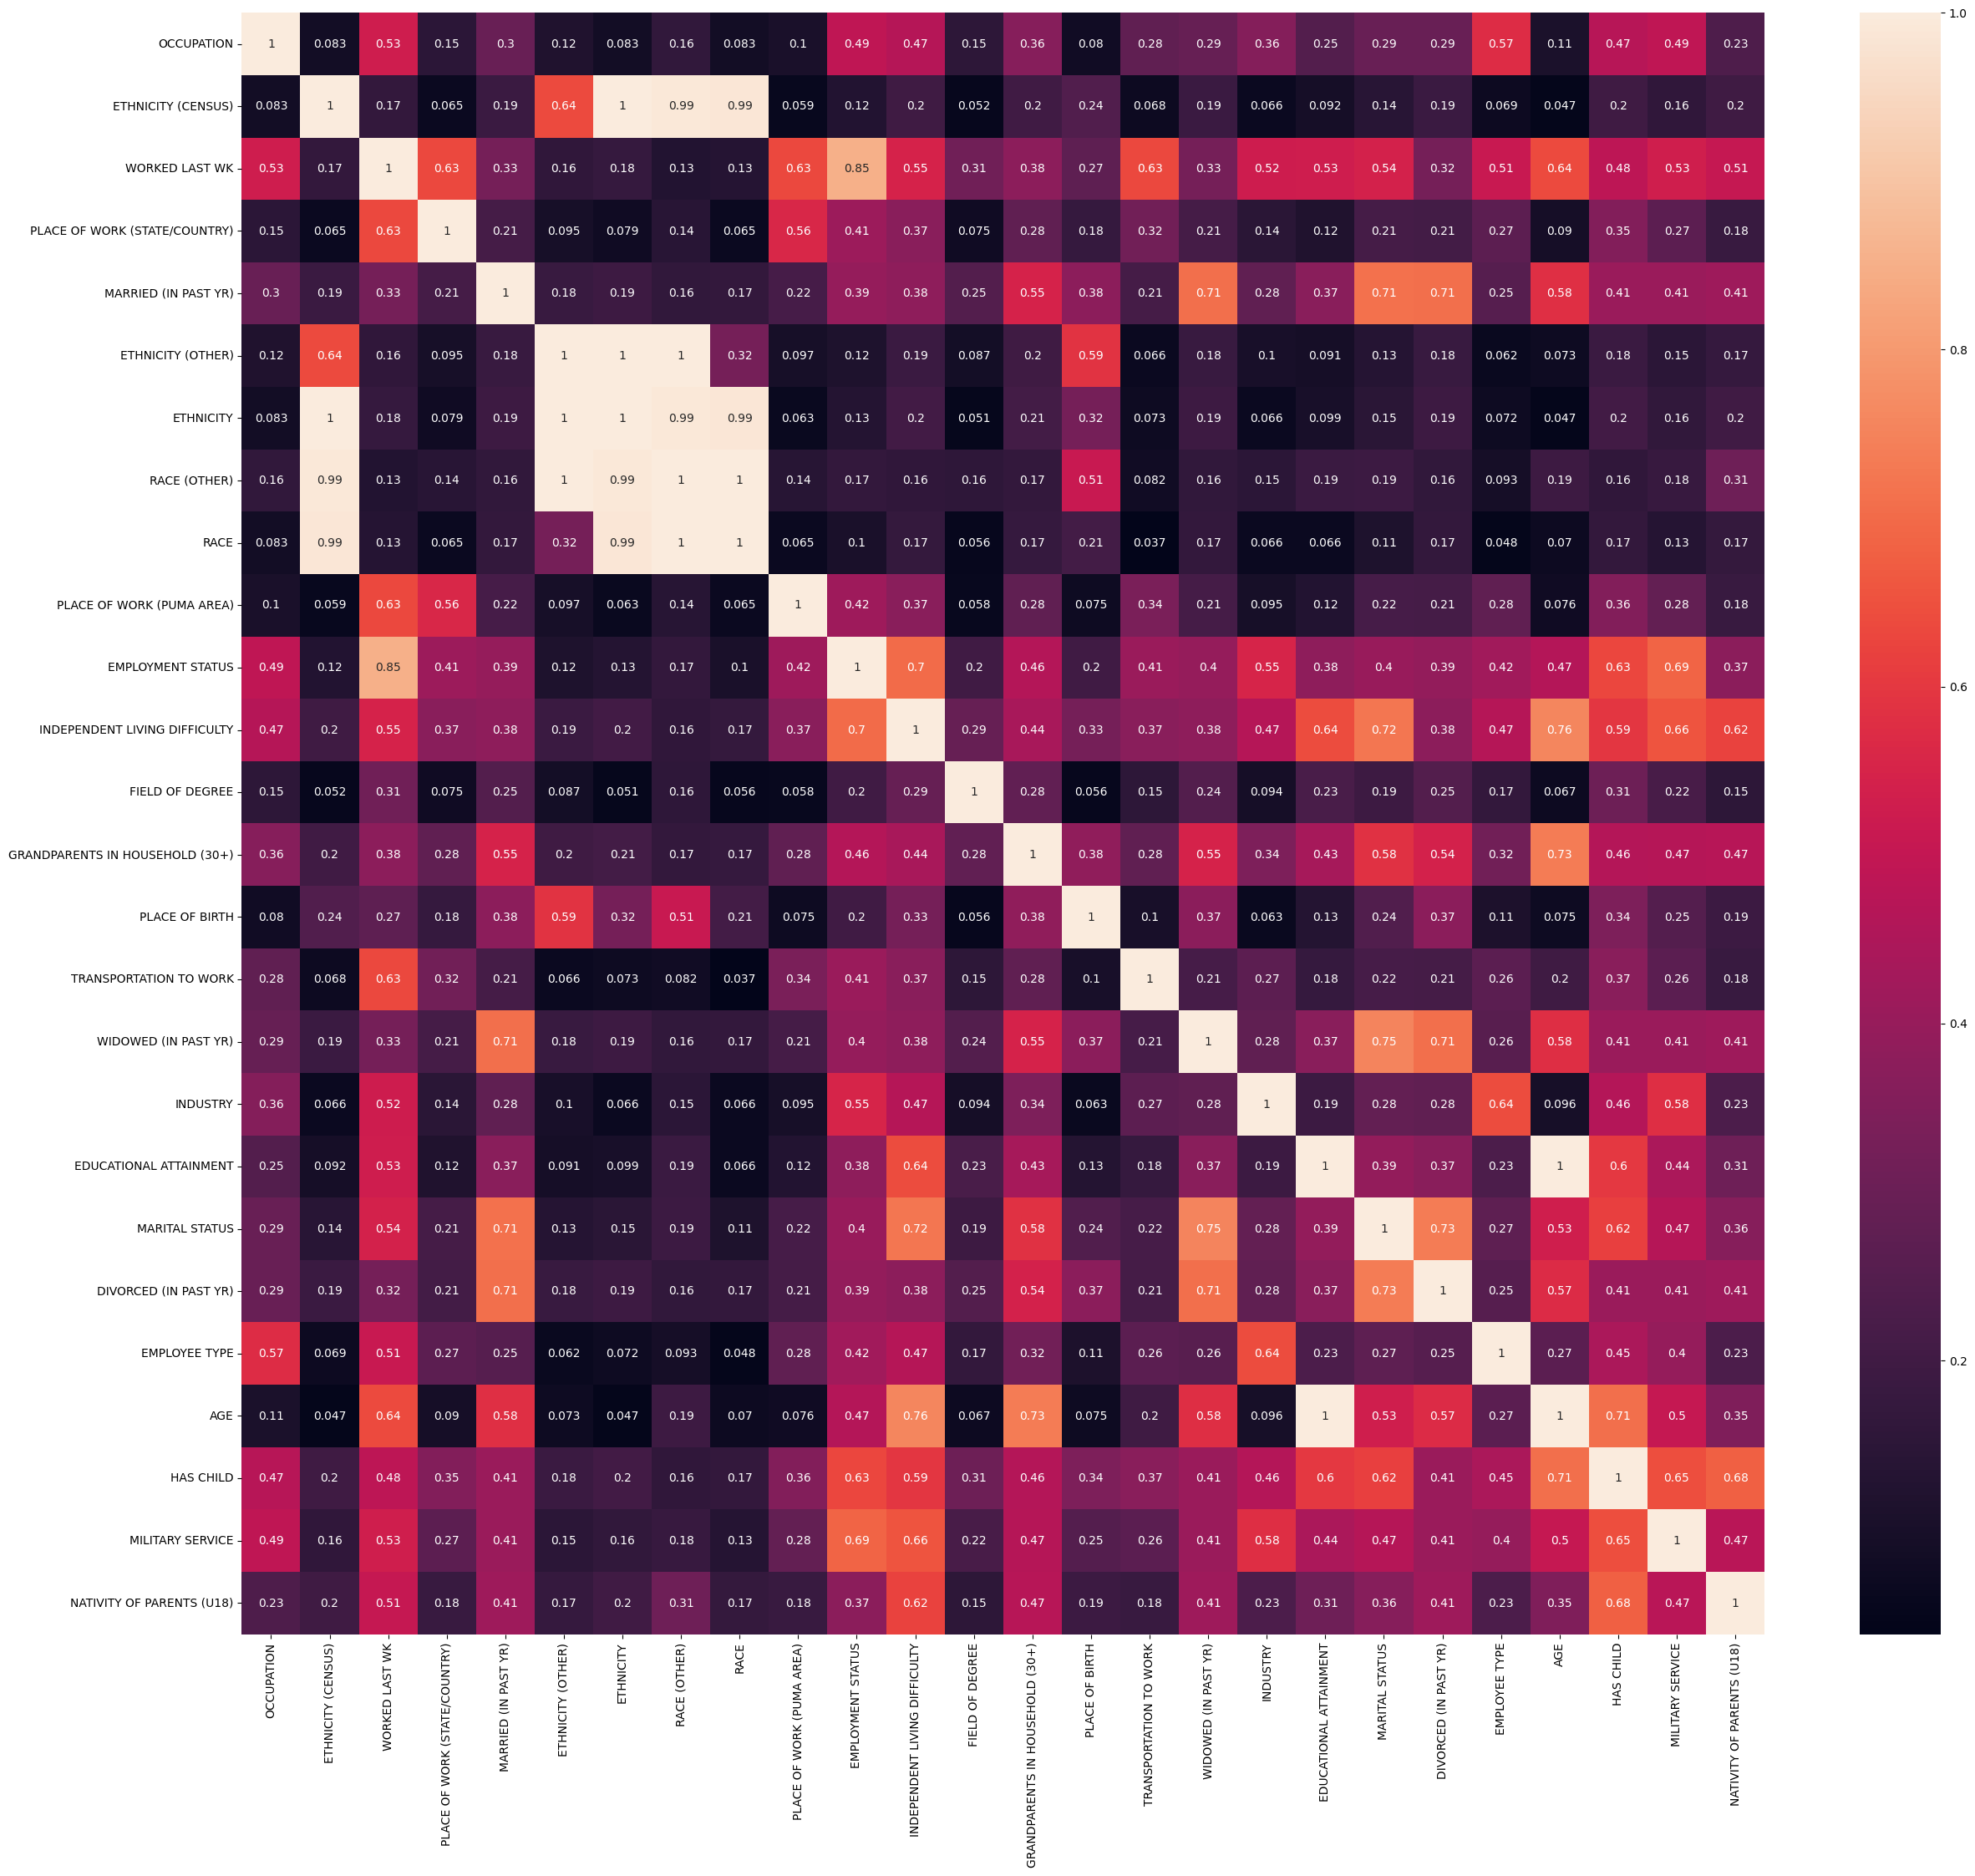

In [18]:
#heat map for dataset features
weight_col = data['SAMPLE WEIGHT']
if 'INCOME' in data.columns:
  d = data.drop('INCOME',axis=1)
else:
  d = data.copy()
d, v, o, n, c = create_corr_heat_map(d, vars, ordinal, nominal, continuous, 0.9, False)

## for race/ethnicity + age

In [19]:
#map ethnoracial numerical values to categories
race_other_mapping = {1: 'Asian alone',
    2: 'Native Hawaiian and Other Pacific Islander alone',
    3: 'Two or More Races'}

race_mapping = {1: 'Asian alone',
    2: 'Native Hawaiian and Other Pacific Islander alone',
    3: 'Asian, Native Hawaiian and Other Pacific Islander',
    4: 'Asian, White',
    5: 'Native Hawaiian and Other Pacific Islander, White',
    6: 'Asian, Black or African American',
    7: 'Native Hawaiian and Other Pacific Islander, Black or African American',
    8: 'Asian, American Indian and Alaska Native',
    9: 'Asian, Some Other Race',
    10: 'Native Hawaiian and Other Pacific Islander, and/or Some Other Race',
    11: 'Asian, White, Black or African American',
    12: 'Asian, White, American Indian and Alaska Native',
    13: 'Asian, White, Native Hawaiian and Other Pacific Islander',
    14: 'Asian, and/or White, and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race',
    15: 'Native Hawaiian and Other Pacific Islander, White, and/or Some Other Race',
    16: 'Black or African American, American Indian and Alaska Native, and/or Asian, and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race',
    17: 'Asian, Black or African American, and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race',
    18: 'Asian, American Indian and Alaska Native, and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race',
    19: 'Asian, and/or Native Hawaiian and Other Pacific Islander groups, and/or Some Other Race',
    20: 'White, and/or Black or African American, and/or American Indian and Alaska Native, and/or Asian, and/or Native Hawaiian and Other Pacific Islander, and/or Some Other Race'}

ethnicity_other_mapping = {1: 'Asian Indian alone',
    2: 'Bangladeshi alone',
    3: 'Bhutanese alone',
    4: 'Burmese alone',
    5: 'Cambodian alone',
    6: 'Chinese, except Taiwanese, alone',
    7: 'Taiwanese alone',
    8: 'Filipino alone',
    9: 'Hmong alone',
    10: 'Indonesian alone',
    11: 'Japanese alone',
    12: 'Korean alone',
    13: 'Laotian alone',
    14: 'Malaysian alone',
    15: 'Mongolian alone',
    16: 'Nepalese alone',
    17: 'Pakistani alone',
    18: 'Sri Lankan alone',
    19: 'Thai alone',
    20: 'Vietnamese alone',
    21: 'Other Asian alone',
    22: 'All combinations of Asian races only',
    23: 'Native Hawaiian alone',
    24: 'Samoan alone',
    25: 'Tongan alone',
    26: 'Chamorro alone',
    27: 'Marshallese alone',
    28: 'Fijian alone',
    29: 'Other Native Hawaiian and Other Pacific Islander',
    30: 'Two or More Races'}

ethnicity_census_mapping = {1: 'Asian Indian alone',
    2: 'Chinese alone',
    3: 'Filipino alone',
    4: 'Japanese alone',
    5: 'Korean alone',
    6: 'Vietnamese alone',
    7: 'Other Asian alone',
    8: 'Native Hawaiian alone',
    9: 'Chamorro alone',
    10: 'Samoan alone',
    11: 'Other Pacific Islander alone',
    12: 'White; Asian Indian',
    13: 'White; Chinese',
    14: 'White; Filipino',
    15: 'White; Japanese',
    16: 'White; Korean',
    17: 'White; Vietnamese',
    18: 'White; Other Asian',
    19: 'White; Native Hawaiian',
    20: 'White; Chamorro',
    21: 'White; Samoan',
    22: 'White; Other Pacific Islander',
    23: 'Black or African American; Asian Indian',
    24: 'Black or African American; Chinese',
    25: 'Black or African American; Filipino',
    26: 'Black or African American; Japanese',
    27: 'Black or African American; Korean',
    28: 'Black or African American; Other Asian',
    29: 'Black or African American; Other Pacific Islander',
    30: 'American Indian and Alaska Native; Asian Indian',
    31: 'American Indian and Alaska Native; Filipino',
    32: 'Asian Indian; Other Asian',
    33: 'Asian Indian; Some Other Race',
    34: 'Chinese; Filipino',
    35: 'Chinese; Japanese',
    36: 'Chinese; Korean',
    37: 'Chinese; Vietnamese',
    38: 'Chinese; Other Asian',
    39: 'Chinese; Native Hawaiian',
    40: 'Filipino; Japanese',
    41: 'Filipino; Native Hawaiian',
    42: 'Filipino; Other Pacific Islander',
    43: 'Filipino; Some Other Race',
    44: 'Japanese; Korean',
    45: 'Japanese; Native Hawaiian',
    46: 'Vietnamese; Other Asian',
    47: 'Other Asian; Other Pacific Islander',
    48: 'Other Asian; Some Other Race',
    49: 'Other Pacific Islander; Some Other Race',
    50: 'White; Black or African American; Filipino',
    51: 'White; American Indian and Alaska Native; Filipino',
    52: 'White; Chinese; Filipino',
    53: 'White; Chinese; Japanese',
    54: 'White; Chinese; Native Hawaiian',
    55: 'White; Filipino; Native Hawaiian',
    56: 'White; Japanese; Native Hawaiian',
    57: 'White; Other Asian; Some Other Race',
    58: 'Chinese; Filipino; Native Hawaiian',
    59: 'White; Chinese; Filipino; Native Hawaiian',
    60: 'White; Chinese; Japanese; Native Hawaiian',
    61: 'Black or African American; Asian groups',
    62: 'Black or African American; Native Hawaiian and Other Pacific Islander groups',
    63: 'Asian Indian; Asian groups',
    64: 'Filipino; Asian groups',
    65: 'White; Black or African American; Asian groups',
    66: 'White; American Indian and Alaska Native; Asian groups',
    67: 'White; Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    68: 'White; Black or African American; American Indian and Alaska Native; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    69: 'White; Black or African American; American Indian and Alaska Native; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    70: 'White; Black or African American; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    71: 'White; American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups',
    72: 'White; Chinese; Filipino; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    73: 'White; Chinese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    74: 'White; Filipino; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    75: 'White; Japanese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    76: 'White; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    77: 'Black or African American; American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    78: 'Black or African American; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    79: 'American Indian and Alaska Native; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    80: 'Asian Indian; and/or White; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    81: 'Chinese; Japanese; Native Hawaiian; and/or other Asian and/or Pacific Islander groups',
    82: 'Chinese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    83: 'Filipino; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    84: 'Japanese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    85: 'Korean; and/or Vietnamese; and/or Other Asian; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    86: 'Native Hawaiian; and/or Pacific Islander groups; and/or Some Other Race',
    87: 'White; and/or Black or African American; and/or American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race'}

ethnicity_mapping = {1: 'Asian Indian alone',
    2: 'Bangladeshi alone',
    3: 'Bhutanese alone',
    4: 'Burmese alone',
    5: 'Cambodian alone',
    6: 'Chinese, except Taiwanese, alone',
    7: 'Taiwanese alone',
    8: 'Filipino alone',
    9: 'Hmong alone',
    10: 'Indonesian alone',
    11: 'Japanese alone',
    12: 'Korean alone',
    13: 'Laotian alone',
    14: 'Malaysian alone',
    15: 'Mongolian alone',
    16: 'Nepalese alone',
    17: 'Pakistani alone',
    18: 'Sri Lankan alone',
    19: 'Thai alone',
    20: 'Vietnamese alone',
    21: 'Other Asian alone',
    22: 'Native Hawaiian alone',
    23: 'Samoan alone',
    24: 'Tongan alone',
    25: 'Chamorro alone',
    26: 'Marshallese alone',
    27: 'Fijian alone',
    28: 'Other Native Hawaiian and Other Pacific Islander',
    29: 'Other Pacific Islander alone',
    30: 'White; Asian Indian',
    31: 'White; Chinese',
    32: 'White; Filipino',
    33: 'White; Japanese',
    34: 'White; Korean',
    35: 'White; Vietnamese',
    36: 'White; Other Asian',
    37: 'White; Native Hawaiian',
    38: 'White; Chamorro',
    39: 'White; Samoan',
    40: 'White; Other Pacific Islander',
    41: 'Black or African American; Asian Indian',
    42: 'Black or African American; Chinese',
    43: 'Black or African American; Filipino',
    44: 'Black or African American; Japanese',
    45: 'Black or African American; Korean',
    46: 'Black or African American; Other Asian',
    47: 'Black or African American; Other Pacific Islander',
    48: 'American Indian and Alaska Native; Asian Indian',
    49: 'American Indian and Alaska Native; Filipino',
    50: 'Asian Indian; Other Asian',
    51: 'Asian Indian; Some Other Race',
    52: 'Chinese; Filipino',
    53: 'Chinese; Japanese',
    54: 'Chinese; Korean',
    55: 'Chinese; Vietnamese',
    56: 'Chinese; Other Asian',
    57: 'Chinese; Native Hawaiian',
    58: 'Filipino; Japanese',
    59: 'Filipino; Native Hawaiian',
    60: 'Filipino; Other Pacific Islander',
    61: 'Filipino; Some Other Race',
    62: 'Japanese; Korean',
    63: 'Japanese; Native Hawaiian',
    64: 'Vietnamese; Other Asian',
    65: 'Other Asian; Other Pacific Islander',
    66: 'Other Asian; Some Other Race',
    67: 'Other Pacific Islander; Some Other Race',
    68: 'White; Black or African American; Filipino',
    69: 'White; American Indian and Alaska Native; Filipino',
    70: 'White; Chinese; Filipino',
    71: 'White; Chinese; Japanese',
    72: 'White; Chinese; Native Hawaiian',
    73: 'White; Filipino; Native Hawaiian',
    74: 'White; Japanese; Native Hawaiian',
    75: 'White; Other Asian; Some Other Race',
    76: 'Chinese; Filipino; Native Hawaiian',
    77: 'White; Chinese; Filipino; Native Hawaiian',
    78: 'White; Chinese; Japanese; Native Hawaiian',
    79: 'Black or African American; Asian groups',
    80: 'Black or African American; Native Hawaiian and Other Pacific Islander groups',
    81: 'Asian Indian; Asian groups',
    82: 'Filipino; Asian groups',
    83: 'White; Black or African American; Asian groups',
    84: 'White; American Indian and Alaska Native; Asian groups',
    85: 'White; Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    86: 'White; Black or African American; American Indian and Alaska Native; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    87: 'White; Black or African American; American Indian and Alaska Native; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    88: 'White; Black or African American; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    89: 'White; American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups',
    90: 'White; Chinese; Filipino; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    91: 'White; Chinese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    92: 'White; Filipino; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    93: 'White; Japanese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    94: 'White; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    95: 'Black or African American; American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    96: 'Black or African American; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    97: 'American Indian and Alaska Native; Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    98: 'Asian Indian; and/or White; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    99: 'Chinese; Japanese; Native Hawaiian; and/or other Asian and/or Pacific Islander groups',
    100: 'Chinese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    101: 'Filipino; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    102: 'Japanese; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    103: 'Korean; and/or Vietnamese; and/or Other Asian; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race',
    104: 'Native Hawaiian; and/or Pacific Islander groups; and/or Some Other Race',
    105: 'White; and/or Black or African American; and/or American Indian and Alaska Native; and/or Asian groups; and/or Native Hawaiian and Other Pacific Islander groups; and/or Some Other Race'}

In [20]:
'''age and race should not have a high correlation when looking at the entire aapi
population. however, differences in mean age across population (affected by different population sizes
and the fact that multiracial/ethnic people tend to be younger
(https://www.census.gov/library/stories/2023/06/nearly-a-third-reporting-two-or-more-races-under-18-in-2020.html))
affects how correlation ratio is calculated, resulting in a much higher relationship measured
between age and race/ethnicity. cramer's v doesn't have that same issue since it
is just checking for strong associations between certain races/ethnicities and
specific age groups, which are not present. thus, age is better treated as ordinal instead
of continuous in the context of this research question''';

age_means = data.groupby('ETHNICITY (OTHER)')['AGE'].apply(lambda x: weighted_mean(x, data.loc[x.index, 'SAMPLE WEIGHT'])).sort_values(ascending=False)

age_means_by_ethnicity_df = age_means.reset_index()
age_means_by_ethnicity_df['ETHNICITY (OTHER)'] = age_means_by_ethnicity_df['ETHNICITY (OTHER)'].map(ethnicity_other_mapping)
print(age_means_by_ethnicity_df)

                                   ETHNICITY (OTHER)        AGE
0                                     Japanese alone  50.866767
1                                         Thai alone  44.156170
2                                     Filipino alone  42.428952
3                                       Korean alone  42.322034
4                                   Indonesian alone  41.438173
5                                       Fijian alone  41.107664
6                   Chinese, except Taiwanese, alone  40.935934
7                                   Sri Lankan alone  40.702910
8                                      Laotian alone  40.155420
9                                   Vietnamese alone  40.050851
10                                   Taiwanese alone  39.309314
11                             Native Hawaiian alone  38.821589
12                                   Cambodian alone  37.974293
13                                   Malaysian alone  37.512349
14                                      

## helper functions

In [21]:
def request_data(request, limiters=[]):
  dfs = []

  if limiters == []: #if no limiters
    response = requests.get(request)
    json_data = json.dumps(response.json())
    df = pd.read_json(json_data)
    return df.rename(columns=df.iloc[0]).loc[1:].reset_index()

  for l in limiters:
    response = requests.get(request+l)
    json_data = json.dumps(response.json())
    df = pd.read_json(json_data)
    df = df.rename(columns=df.iloc[0]).loc[1:].reset_index()
    dfs.append(df)

  return pd.concat(dfs, ignore_index=True)

In [22]:
def print_unique_vals(df, vars):
  for col in vars:
    print("col")
    print(df[col].value_counts())

## for income + ethnicity/race

In [23]:
#average incomes for each race
race_avg_income = data.groupby('RACE')['INCOME'].apply(lambda x: weighted_mean(x, data.loc[x.index, 'SAMPLE WEIGHT'])).sort_values(ascending=False)
race_avg_income_df = race_avg_income.reset_index()
race_avg_income_df['RACE'] = race_avg_income_df['RACE'].map(race_mapping)
pd.set_option('display.max_colwidth', 60)
print("average income by race")
print(race_avg_income_df)

average income by race
                                                           RACE        INCOME
0                                                   Asian alone  43559.843112
1             Asian, Native Hawaiian and Other Pacific Islander  34245.778775
2      Asian, White, Native Hawaiian and Other Pacific Islander  24228.813681
3              Native Hawaiian and Other Pacific Islander alone  23009.637471
4                      Asian, American Indian and Alaska Native  22997.184900
5   Native Hawaiian and Other Pacific Islander, and/or Some ...  22849.071959
6             Native Hawaiian and Other Pacific Islander, White  21874.499116
7                                                  Asian, White  21106.718966
8   Asian, and/or Native Hawaiian and Other Pacific Islander...  18066.824265
9                              Asian, Black or African American  16815.028480
10              Asian, White, American Indian and Alaska Native  15979.404616
11  Asian, American Indian and Alaska Nat

In [24]:
#average incomes for each ethnicity
eth_avg_income = data.groupby('ETHNICITY')['INCOME'].apply(lambda x: weighted_mean(x, data.loc[x.index, 'SAMPLE WEIGHT'])).sort_values(ascending=False)
eth_avg_income_df = eth_avg_income.reset_index()
eth_avg_income_df['ETHNICITY'] = eth_avg_income_df['ETHNICITY'].map(ethnicity_mapping)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', len(data))
print("average income by ethnicity")
print(eth_avg_income_df)

average income by ethnicity
                                                       ETHNICITY        INCOME
0                                                Taiwanese alone  64579.250589
1                                             Asian Indian alone  58079.419172
2                                                 Japanese alone  51238.628512
3                               Chinese, except Taiwanese, alone  47602.191265
4                                       Chinese; Native Hawaiian  47407.423118
5                                                   Korean alone  46733.083457
6                                                Malaysian alone  46600.234576
7                                              Chinese; Filipino  44608.587377
8                                              Chinese; Japanese  44229.903135
9                                               Sri Lankan alone  42986.238016
10                                          Chinese; Other Asian  41129.023457
11                      

In [25]:
#checking relationship between specific ETHNICITY (CENSUS) values + income
df = request_data("https://api.census.gov/data/2021/acs/acs1/pums?get=PWGTP,PINCP,SERIALNO,SPORDER&RAC3P=004&RAC3P=006&RAC3P=013")
df.drop([housing_identifier, person_identifier],axis=1,inplace=True)
df = df.astype('int32')

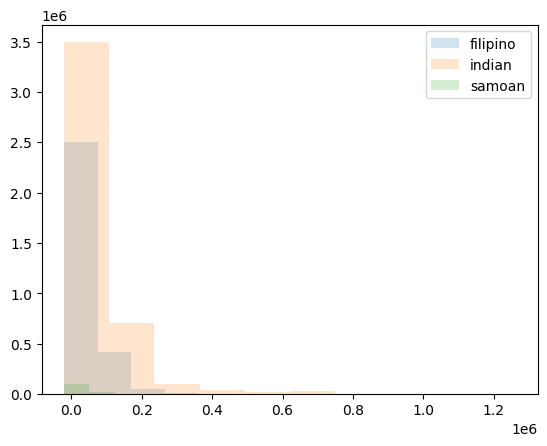

In [39]:
#histogram
unique = df['RAC3P'].unique()
ethnicities = {6:"filipino",4:"indian",13:"samoan"}

for val in unique:
  new_df = df[df["RAC3P"] == val]
  plt.hist(new_df["PINCP"], weights=new_df["PWGTP"], label=ethnicities[val], alpha=.2)

plt.legend(loc='upper right')
plt.show()

## for income + ethnicity/race + age

In [91]:
def plot_income_by_variable(data, variable, mapping, figsize, color_palette, legendfontsize, width, wrap=False, wrap_width=25):
  fig, ax = plt.subplots(figsize=figsize)

  for i, category in enumerate(data[variable].unique()):
    subset_data = data[data[variable] == category]

    avg_income_by_age = subset_data.groupby('AGE')['INCOME'].apply(
      lambda x: weighted_mean(x, data.loc[x.index, 'SAMPLE WEIGHT'])
    ).sort_values(ascending=False)

    legend_label = mapping[category]
    if wrap:
      legend_label = '\n'.join(textwrap.wrap(legend_label, width=wrap_width))

    sns.lineplot(x=avg_income_by_age.index, y=avg_income_by_age.values,
                 label=legend_label, ax=ax, linewidth=width,
                 color=color_palette[i])

  titlefontsize = int(figsize[0] * 1.7)
  ax.axis('off')

  ax.set_title(f'Income by {variable}', fontsize=titlefontsize)
  ax.xaxis.set_tick_params(pad=5)
  ax.yaxis.set_tick_params(pad=5)

  ax.legend(loc='upper left', fontsize=legendfontsize)

  plt.tight_layout()
  plt.show()

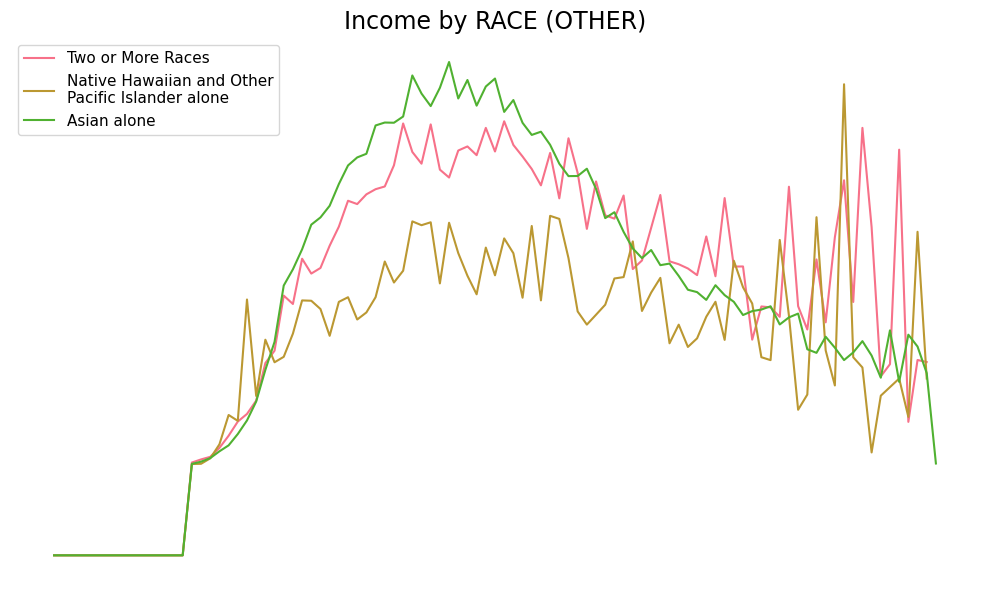

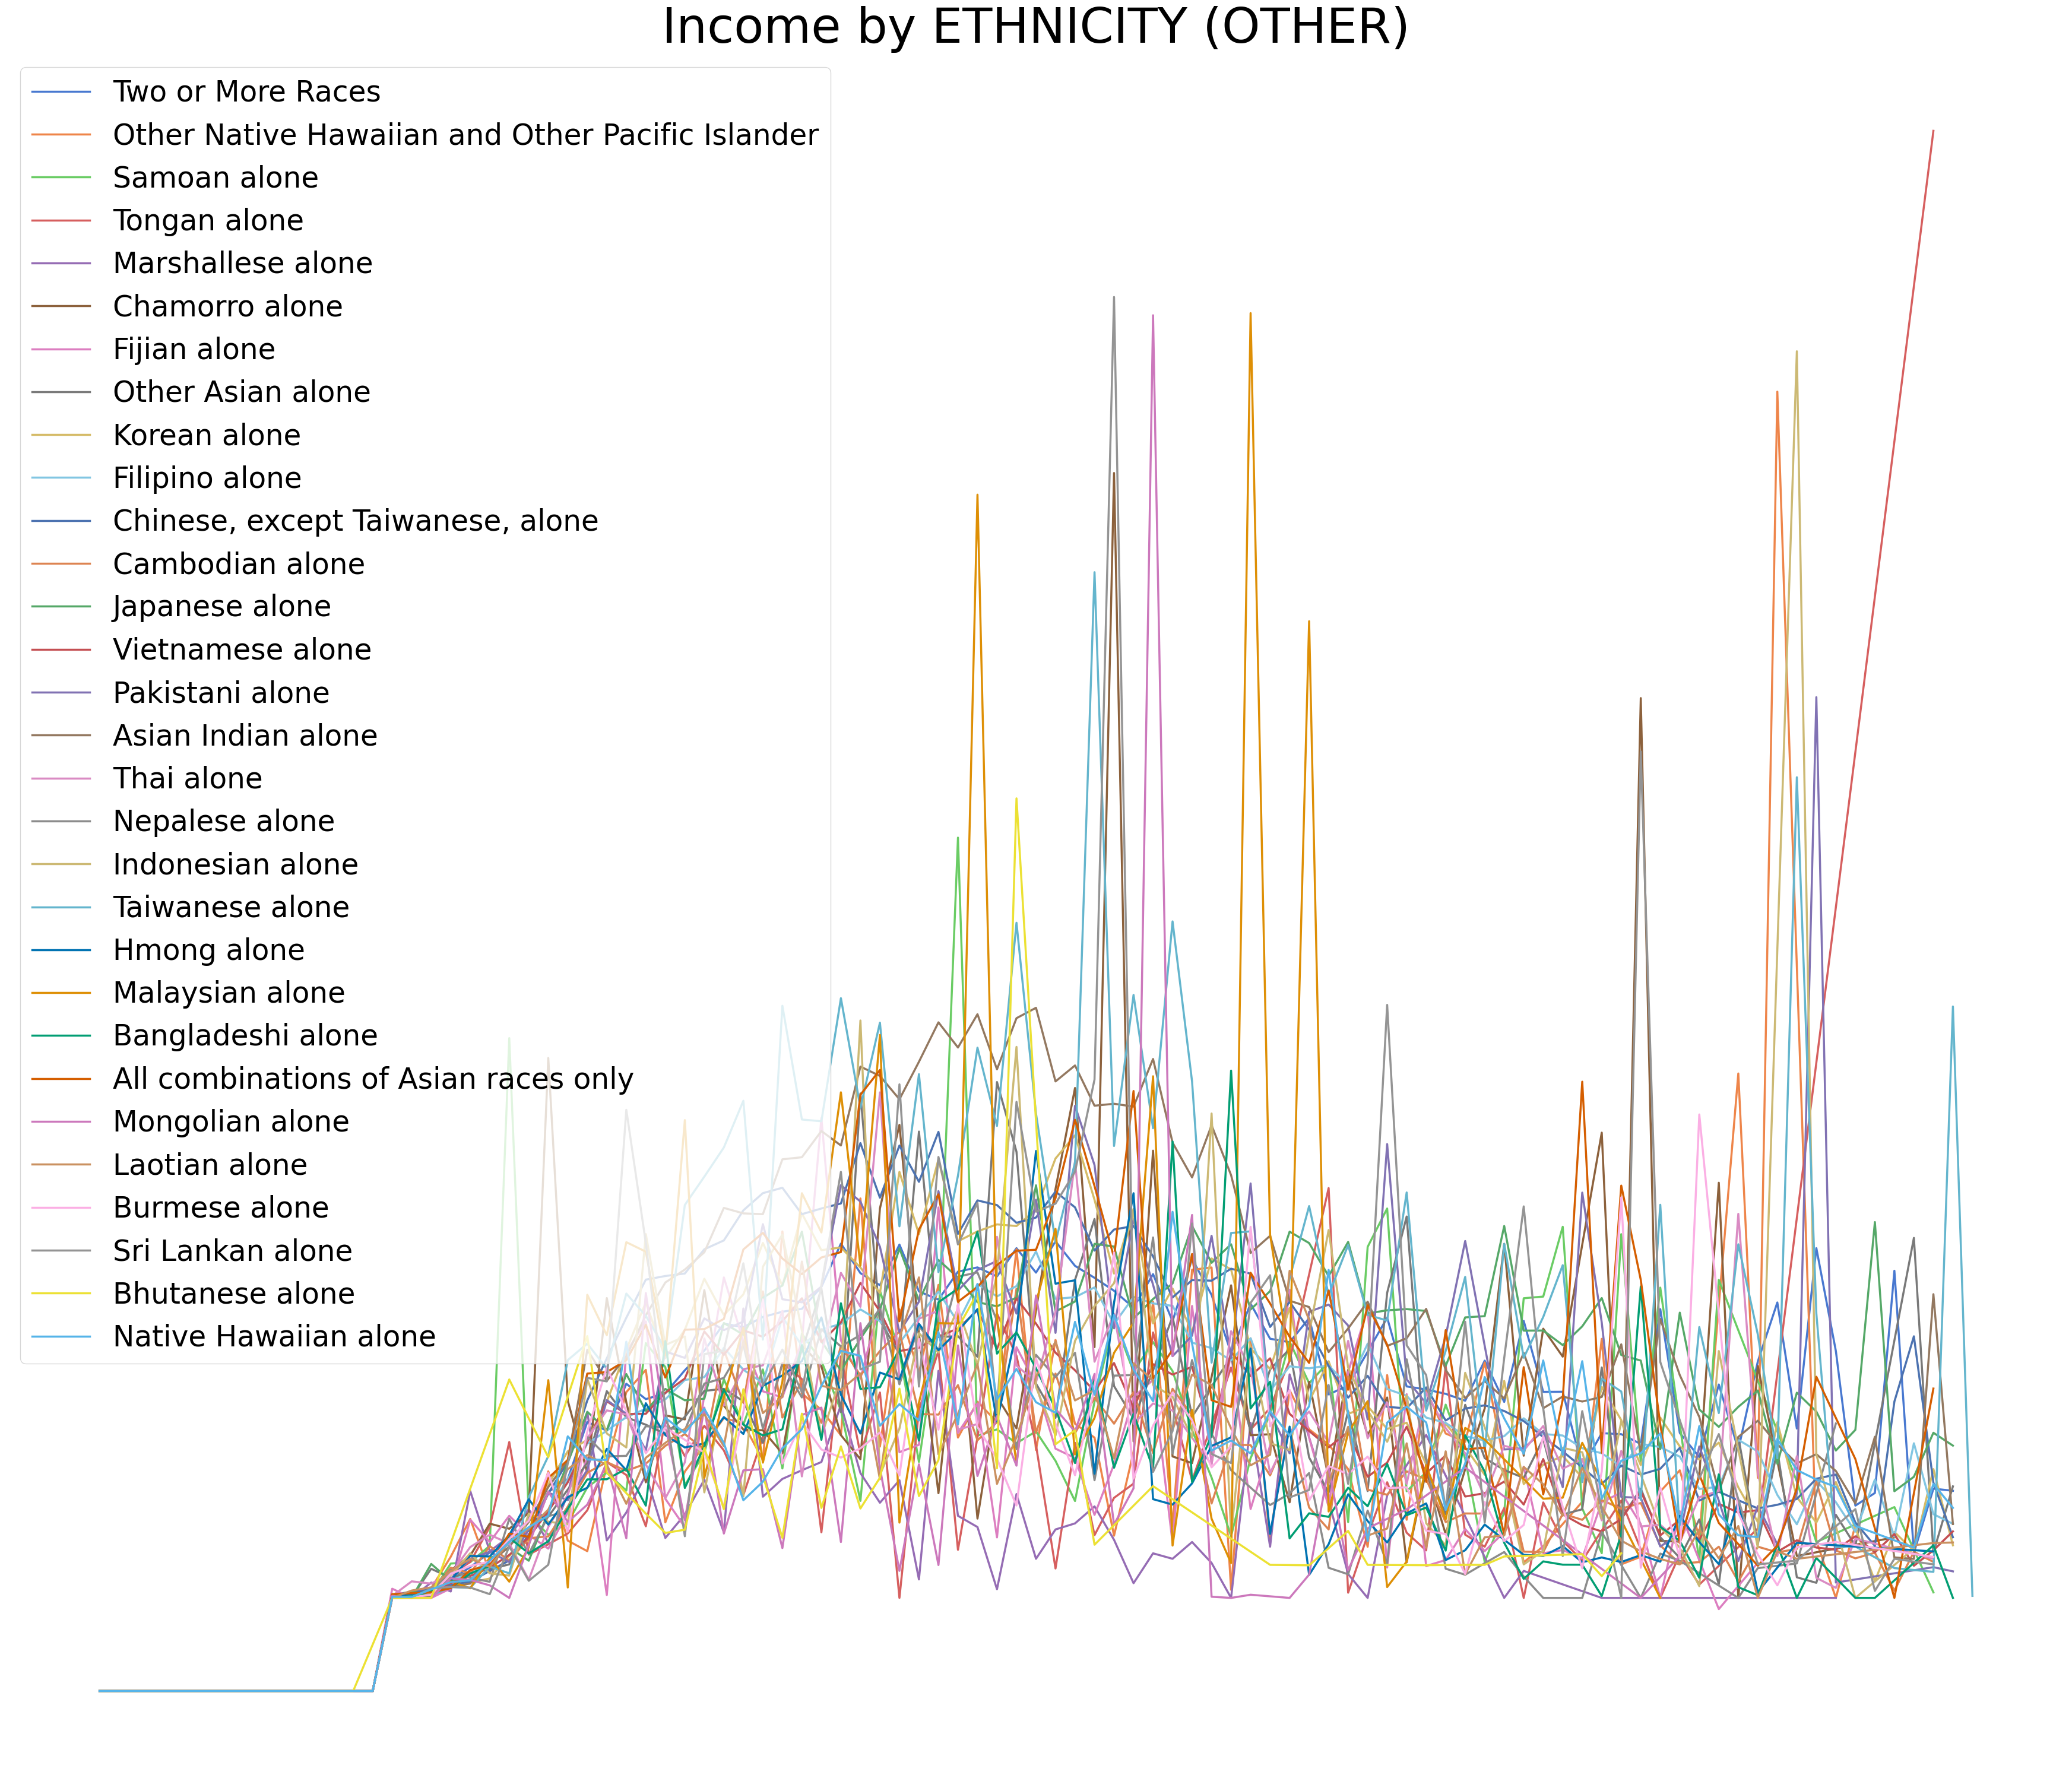

In [92]:
#visualizations for race (other)/ethncity (other) (other vars had too many categories to be visualized)
plot_income_by_variable(data, 'RACE (OTHER)', race_other_mapping, (10, 6), sns.color_palette("husl"), 11, 1.5, wrap=True)
plot_income_by_variable(data, 'ETHNICITY (OTHER)', ethnicity_other_mapping, (35, 30), sns.color_palette("muted") + sns.color_palette("deep") + sns.color_palette("colorblind"),  35, 2.5)

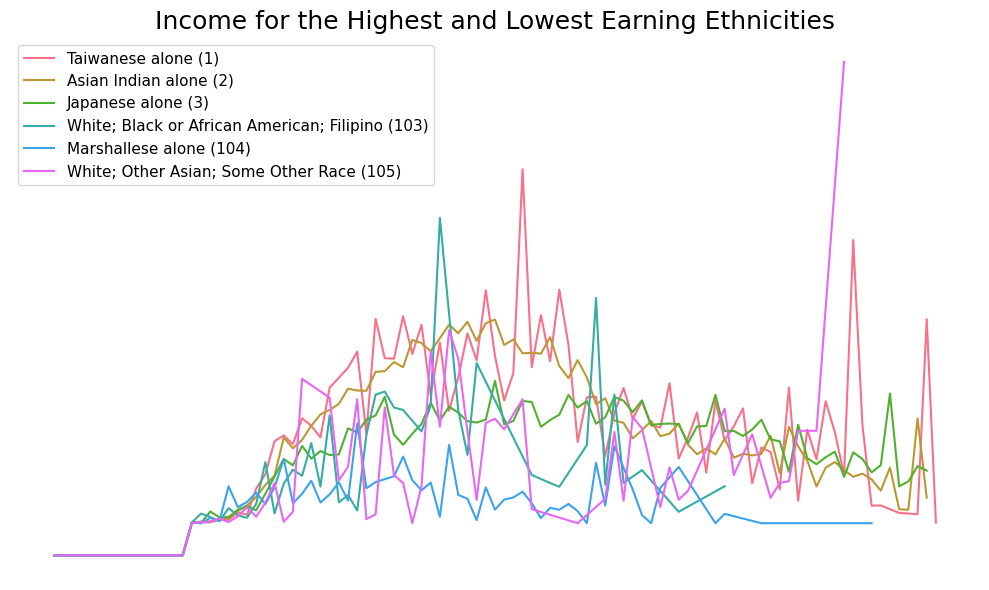

In [83]:
#highest 3 and lowest 3 average incomes (by ethnicity)
ethnicities = eth_avg_income.nlargest(3).index.tolist() + eth_avg_income.nsmallest(3).index.tolist()
color_palette = sns.color_palette("husl")
rank = [1, 2, 3, 103, 104, 105]

fig, ax = plt.subplots(figsize=(10, 6))

for i, ethnicity in enumerate(ethnicities):
    subset_data = data[data['ETHNICITY'] == ethnicity]

    avg_income_by_age = subset_data.groupby('AGE')['INCOME'].apply(
        lambda x: weighted_mean(x, data.loc[x.index, 'SAMPLE WEIGHT'])).sort_values(ascending=False)

    sns.lineplot(x=avg_income_by_age.index, y=avg_income_by_age.values,
                 label=f"{ethnicity_mapping[ethnicity]} ({rank[i]})", ax=ax, linewidth=1.5,
                 color=color_palette[i])

ax.tick_params(axis='both', labelsize=10)
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.axis('off')

handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[ethnicities.index(ethnicity)] for ethnicity in ethnicities]
sorted_labels = [f"{ethnicity_mapping[ethnicity]} ({rank[i]})" for i, ethnicity in enumerate(ethnicities)]
ax.legend(sorted_handles, sorted_labels, loc='upper left', fontsize=11)

ax.set_title('Income for the Highest and Lowest Earning Ethnicities', fontsize=18)
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)

plt.tight_layout()
plt.show()